## Names
1. 169084 - Ali Omar
2. 168945 - Denzel Ngare
3. 169819 - Sumeiya Abass
4. 169977 - Suweyba Ahmed
5. 150496 - Emran Abdi Ahmed
6. 150350 - Alio Ilyas Abdi

## Question one: Cleaning the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns = df.columns.str.replace(' ','_').str.replace('(','').str.replace(')','')
df['Gender'] = df['Gender'].str.strip().str.capitalize()
print("✅ Cleaned column names:", df.columns.tolist())
print("✅ Unique Gender values:", df['Gender'].unique())

✅ Cleaned column names: ['CustomerID', 'Gender', 'Age', 'Annual_Income_k$', 'Spending_Score_1-100']
✅ Unique Gender values: ['Male' 'Female']


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## Question Two: Doing Exploratory Data Analysis

In [8]:
print("Basic summary:")
print(df.describe())

Basic summary:
       CustomerID         Age  Annual_Income_k$  Spending_Score_1-100
count  200.000000  200.000000        200.000000            200.000000
mean   100.500000   38.850000         60.560000             50.200000
std     57.879185   13.969007         26.264721             25.823522
min      1.000000   18.000000         15.000000              1.000000
25%     50.750000   28.750000         41.500000             34.750000
50%    100.500000   36.000000         61.500000             50.000000
75%    150.250000   49.000000         78.000000             73.000000
max    200.000000   70.000000        137.000000             99.000000


#### Gender Distribution

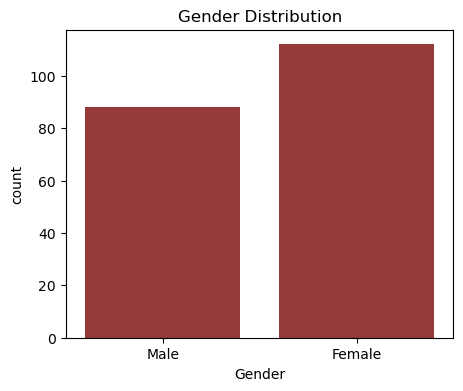

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df, color='brown')
plt.title('Gender Distribution')
plt.show()

#### Age Distribution

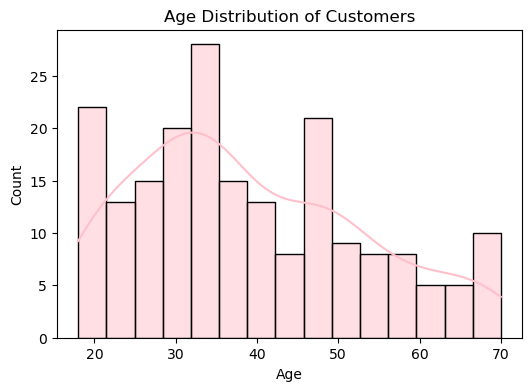

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=True, color='pink')
plt.title('Age Distribution of Customers')
plt.show()

#### Annual Income Distribution

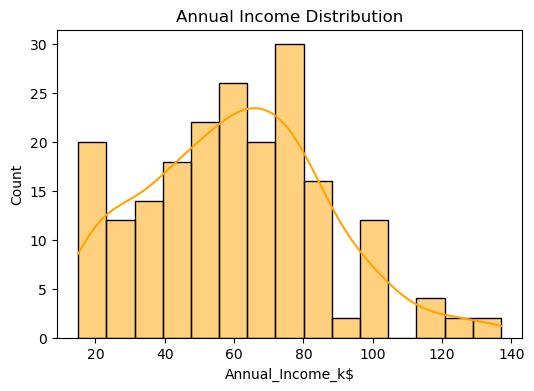

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df['Annual_Income_k$'], bins=15, kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.show()

#### Spending Score Distribution

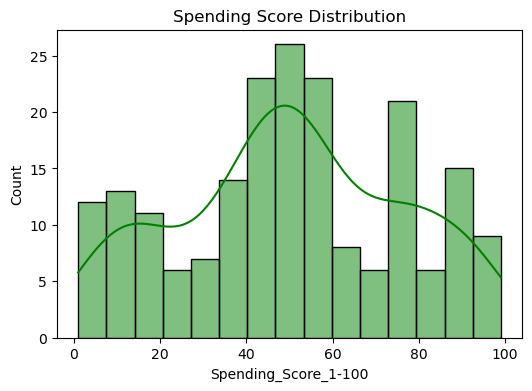

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['Spending_Score_1-100'], bins=15, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.show()

#### Relationship between Income and Spending Score

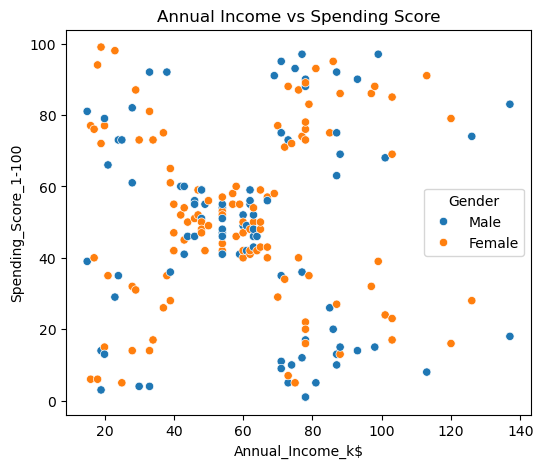

In [19]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Annual_Income_k$', y='Spending_Score_1-100', data=df, hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.show()

#### EDA Insights

In [23]:
# Insight 1: Age
median_age = df['Age'].median()
print(f"1️⃣ Most customers are around {median_age} years old — the mall mainly attracts young to middle-aged adults.")

# Insight 2: Income distribution
avg_income = df['Annual_Income_k$'].mean()
print(f"2️⃣ The average annual income is about ${avg_income:.1f}k, showing a mid-income customer base.")

# Insight 3: 
corr = df['Annual_Income_k$'].corr(df['Spending_Score_1-100'])
if abs(corr) < 0.3:
    relation = "weak"
elif abs(corr) < 0.6:
    relation = "moderate"
else:
    relation = "strong"
print(f"3️⃣ The correlation between income and spending score is {corr:.2f}, which indicates a {relation} relationship — high income doesn’t always mean high spending.")


1️⃣ Most customers are around 36.0 years old — the mall mainly attracts young to middle-aged adults.
2️⃣ The average annual income is about $60.6k, showing a mid-income customer base.
3️⃣ The correlation between income and spending score is 0.01, which indicates a weak relationship — high income doesn’t always mean high spending.


## Question Three: Using the k-means algorithm

#### 3a: 1 suitable feature.

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

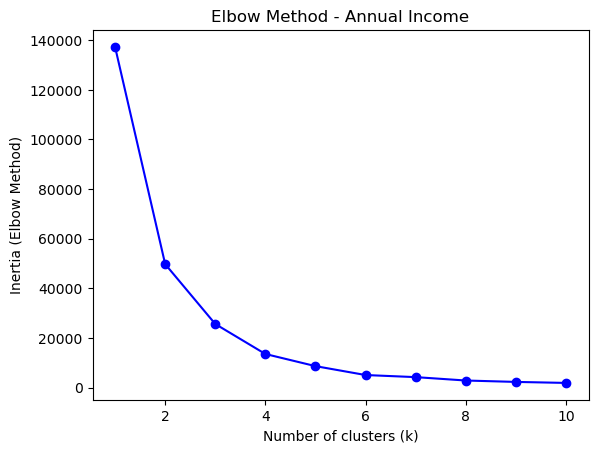

In [30]:
# Single feature
X1 = df[['Annual_Income_k$']]
# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Elbow Method)')
plt.title('Elbow Method - Annual Income')
plt.show()

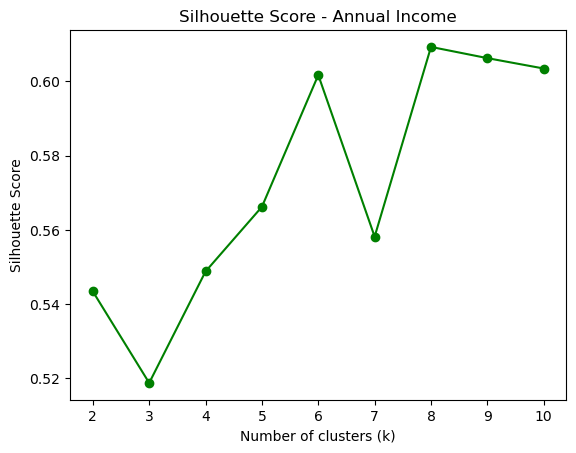

In [31]:
# Silhoutte Scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X1)
    score = silhouette_score(X1, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - Annual Income')
plt.show()

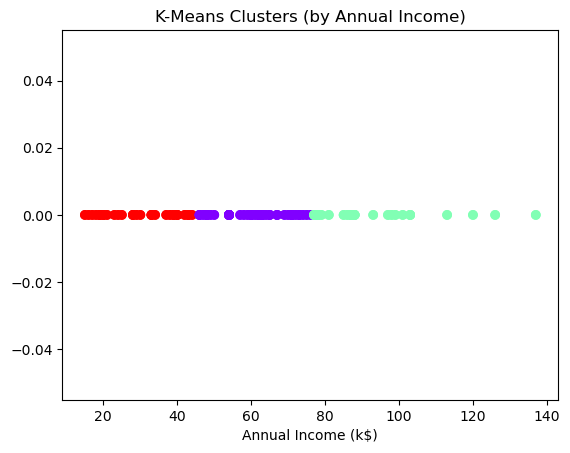

In [32]:
# Choose the best k
kmeans_1f = KMeans(n_clusters=3, random_state=42)
df['Income_Cluster'] = kmeans_1f.fit_predict(X1)

plt.scatter(df['Annual_Income_k$'], [0]*len(df), c=df['Income_Cluster'], cmap='rainbow')
plt.title('K-Means Clusters (by Annual Income)')
plt.xlabel('Annual Income (k$)')
plt.show()

#### 3b: 2 suitable features.

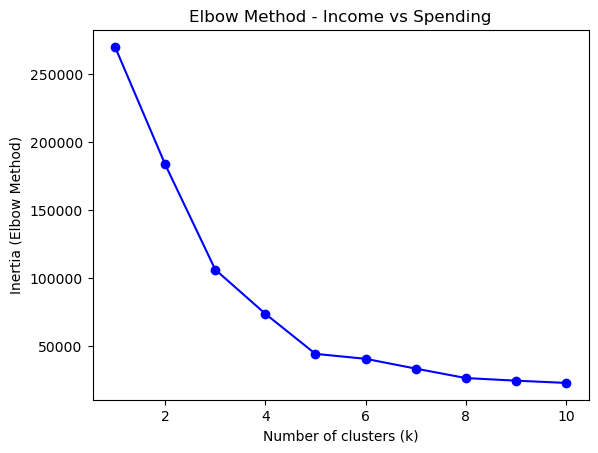

In [33]:
# Two features
X2 = df[['Annual_Income_k$', 'Spending_Score_1-100']]
# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Elbow Method)')
plt.title('Elbow Method - Income vs Spending')
plt.show()

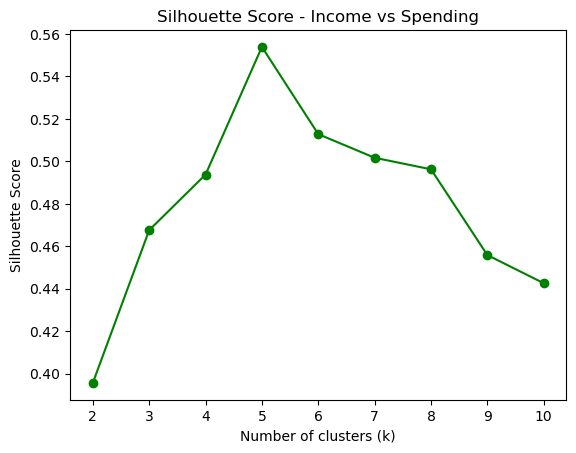

In [34]:
# Silhouette Scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X2)
    score = silhouette_score(X2, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - Income vs Spending')
plt.show()

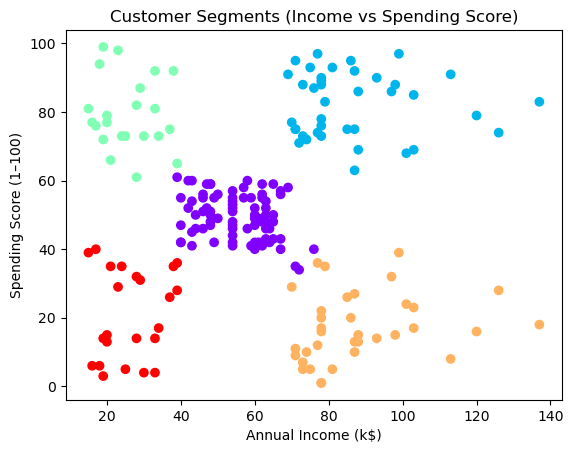

In [36]:
# Choose the best k
kmeans_2f = KMeans(n_clusters=5, random_state=42)
df['Income_Spending_Cluster'] = kmeans_2f.fit_predict(X2)

plt.scatter(df['Annual_Income_k$'], df['Spending_Score_1-100'],
            c=df['Income_Spending_Cluster'], cmap='rainbow')
plt.title('Customer Segments (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.show()

## Question Four: Visualise and compare the clusters

([], [])

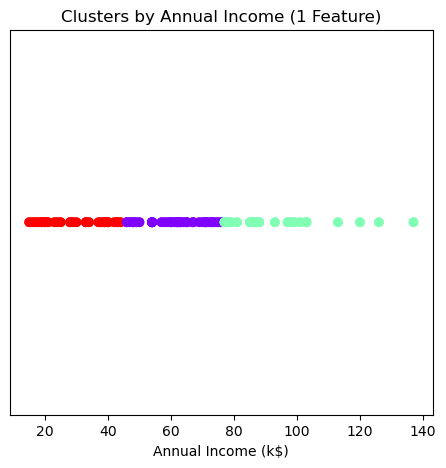

In [37]:
# Clustering 1 feature
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df['Annual_Income_k$'], [0]*len(df), 
            c=df['Income_Cluster'], cmap='rainbow')
plt.title('Clusters by Annual Income (1 Feature)')
plt.xlabel('Annual Income (k$)')
plt.yticks([])

Text(0, 0.5, 'Spending Score (1–100)')

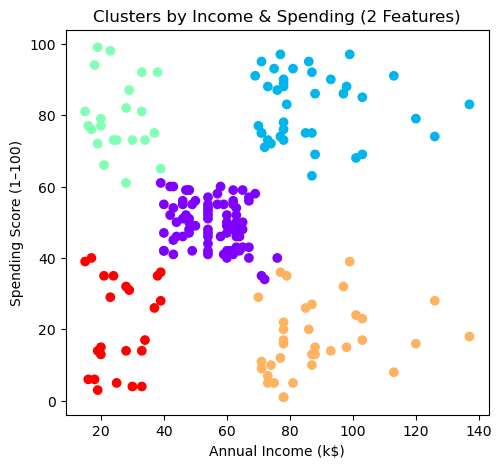

In [38]:
# Clustering 2 features
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.scatter(df['Annual_Income_k$'], df['Spending_Score_1-100'], 
            c=df['Income_Spending_Cluster'], cmap='rainbow')
plt.title('Clusters by Income & Spending (2 Features)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')

### Comparison of the clusters
- In the 1-feature clustering, customers are grouped only by annual income.
The clusters represent income levels (low, medium, high), but they don’t show how customers actually spend.
The plot is linear and provides limited insight.
- In the 2-feature clustering, customers are grouped by both annual income and spending score, producing five well-separated segments.
This visualization shows a richer distribution of customer behavior e.g.
    1. High income but low spending (potential customers to target)
    2. Low income but high spending (loyal shoppers)
    3. Moderate income and spending (average customers)
#### - Therefore, using 2 feature gives clearercustomer groups than using one feature.

## Question Five: Mall Management

### Cluster Descriptions and Engagement Strategies
- Using the Annual Income and Spending Score clustering, the mall's patrons can be separated into five major groups. A distinct group with varying spending patterns and engagement requirements is represented by each cluster.

1. Cluster 1 – Low Income, Low Spending (Budget Shoppers)
   - Features include low mall activity and limited purchasing power.
   - Engagement Strategies:
     - Provide discounts, coupons, and loyalty plans as engagement strategies.
     - Encourage package deals and affordable brands.
     - Notify customers via email or SMS about sales events to promote visits.

2. Cluster 2 – Low Income, High Spending (Enthusiastic Shoppers)
   - Features include spending a lot despite having low income — value fashion, trends, or experiences.
   - Engagement Strategies:
     - Provide buy-now-pay-later or installment options.
     - Offer exclusive membership perks for frequent shoppers.
     - Use social media engagement (giveaways, influencer marketing).

3. Cluster 3 – Medium Income, Medium Spending (Average Shoppers)
   - Features include consistency in spending; represents the largest segment.
   - Engagement Strategies:
     - Maintain personalized offers and occasional discounts.
     - Promote family events or mid-range stores.
     - Send seasonal newsletters to maintain loyalty.

4. Cluster 4 – High Income, Low Spending (Potential Customers)
   - Features include have money but do not spend much in the mall.
   - Engagement Strategies:
     - Introduce premium experiences (VIP lounges, exclusive previews).
     - Offer personal shopper or concierge services.
     - Send targeted ads highlighting luxury brands or high-end events.

5. Cluster 5 – High Income, High Spending (Premium Customers)
   - Features include top spenders who are loyal and enjoy luxury shopping.
   - Engagement Strategies:
     - Provide exclusive rewards or invitation-only events.
     - Offer priority parking, early access to new products, and personalized communication.
     - Maintain strong customer relationship management to ensure satisfaction.

## Team photo

![Team Photo](Team_Photo.png)